In [1]:
import numpy as np
import pandas as pd

In [10]:
dataset=pd.read_csv(r"Downloads\data.csv")

In [11]:
dataset.head(3)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060


In [12]:
#2.checking for missing values
dataset.isnull().any()

sno            False
Temperature    False
Pressure       False
dtype: bool

In [15]:
#position is having level hence no need to do labelencoding
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2:3].values

In [16]:
dataset.describe()

,sno,Temperature,Pressure
count,6.000000,6.000000,6.000000
mean,3.500000,50.000000,0.066233
std,1.870829,37.416574,0.105467
min,1.000000,0.000000,0.000200
25%,2.250000,25.000000,0.002400
50%,3.500000,50.000000,0.018000
75%,4.750000,75.000000,0.075000
max,6.000000,100.000000,0.270000


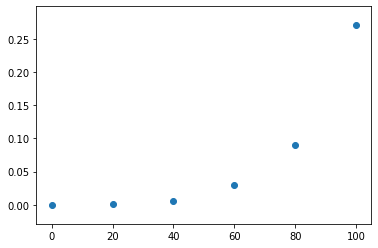

In [17]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Temperature'],dataset['Pressure'])

In [18]:
#applying linear regression first then polynomial regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred=lin_reg.predict(x)

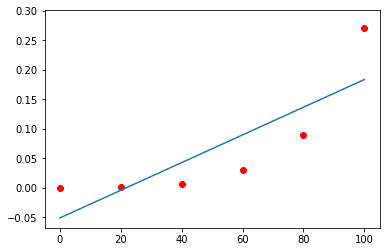

In [20]:
plt.scatter(x,y,color="red")
plt.plot(x,y_pred)

In [21]:
y

array([[2.0e-04],
       [1.2e-03],
       [6.0e-03],
       [3.0e-02],
       [9.0e-02],
       [2.7e-01]])

In [22]:
y_pred

array([[-0.05086667],
       [-0.00402667],
       [ 0.04281333],
       [ 0.08965333],
       [ 0.13649333],
       [ 0.18333333]])

In [23]:
#checking accuracy it is giving if we implement linear regression to it
from sklearn.metrics import r2_score
accuracy_linear=r2_score(y,y_pred)

In [24]:
accuracy_linear
#very least value so hence we go for polynomial equation

0.690349972603981

In [25]:
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)

In [27]:
x_poly

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+01, 4.000e+02, 8.000e+03, 1.600e+05],
       [1.000e+00, 4.000e+01, 1.600e+03, 6.400e+04, 2.560e+06],
       [1.000e+00, 6.000e+01, 3.600e+03, 2.160e+05, 1.296e+07],
       [1.000e+00, 8.000e+01, 6.400e+03, 5.120e+05, 4.096e+07],
       [1.000e+00, 1.000e+02, 1.000e+04, 1.000e+06, 1.000e+08]])

In [28]:
poly_reg.fit(x_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [29]:
lin_reg_2=LinearRegression()#<-------linear regression we are converting it to
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
poly=lin_reg_2.predict(x_poly)

In [31]:
poly

array([[ 4.61111118e-04],
       [-1.05555554e-04],
       [ 8.61111111e-03],
       [ 2.73888889e-02],
       [ 9.13055556e-02],
       [ 2.69738889e-01]])

In [32]:
y

array([[2.0e-04],
       [1.2e-03],
       [6.0e-03],
       [3.0e-02],
       [9.0e-02],
       [2.7e-01]])

In [33]:
accuracypoly=r2_score(y,poly)

In [34]:
accuracypoly

0.9996910780718014

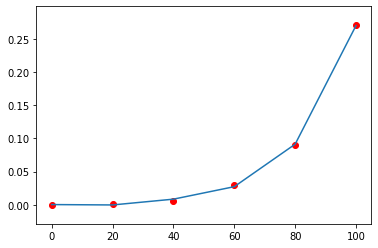

In [35]:
plt.scatter(x,y,color="red")
plt.plot(x,poly)

In [53]:
y1=lin_reg_2.predict([[1,20000,40000,80000,160000]])

In [54]:
y1[0][0]

-11.609276398758182